In [1]:
#Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime

In [2]:
# import hyrum 

articles_1 = pd.read_csv('2014_2017.csv')


In [3]:
articles_1.shape

(26000, 20)

In [4]:
articles_1.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri'],
      dtype='object')

In [5]:
# import pat pulls
articles_2 = pd.read_csv('data_2011-2013_PL.csv')

In [6]:
articles_2.shape

(16800, 21)

In [7]:
articles_2.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'print_section', 'print_page', 'source', 'multimedia', 'headline',
       'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'subsection_name'],
      dtype='object')

In [8]:
articles_2['pub_date']

0        2013-12-31 23:48:51+00:00
1        2013-12-31 22:56:18+00:00
2        2013-12-31 22:48:35+00:00
3        2013-12-31 21:36:51+00:00
4        2013-12-31 19:37:42+00:00
                   ...            
16795    2010-12-28 01:26:13+00:00
16796    2010-12-28 01:18:26+00:00
16797    2010-12-28 01:09:45+00:00
16798    2010-12-28 01:03:13+00:00
16799    2010-12-27 23:38:59+00:00
Name: pub_date, Length: 16800, dtype: object

In [9]:
# import Tan pulls 
df_1 = pd.read_csv('df_1.csv')
df_2 = pd.read_csv('df_2.csv')
df_3 = pd.read_csv('df_3.csv')
df_4 = pd.read_csv('df_4.csv')
df_5 = pd.read_csv('df_5.csv')
df_6 = pd.read_csv('df_6.csv')
df_7 = pd.read_csv('df_7.csv')
df_8 = pd.read_csv('df_8.csv')
df_9 = pd.read_csv('df_9.csv')
df_10 = pd.read_csv('df_10.csv')
df_11 = pd.read_csv('df_11.csv')

# combine Tan files into single dataframe 
dfs = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11]
articles_3 = pd.concat(dfs,ignore_index=True)


In [10]:
articles_3.shape

(21000, 21)

In [11]:
articles_3['pub_date']

0        2021-08-17 21:47:12+00:00
1        2021-08-17 18:12:52+00:00
2        2021-08-17 16:59:51+00:00
3        2021-08-17 15:33:53+00:00
4        2021-08-17 15:00:06+00:00
                   ...            
20995    2016-09-06 15:33:30+00:00
20996    2016-09-06 15:32:36+00:00
20997    2016-09-06 15:25:36+00:00
20998    2016-09-06 13:54:02+00:00
20999    2016-09-06 13:20:44+00:00
Name: pub_date, Length: 21000, dtype: object

In [12]:
articles_df = pd.concat([articles_1,articles_2,articles_3])

In [13]:
articles_df.shape

(63800, 21)

In [14]:
articles_df.isnull().sum()

abstract               33
web_url                 0
snippet               635
lead_paragraph        111
print_section       18710
print_page          18704
source                  0
multimedia              0
headline                0
keywords                0
pub_date                0
document_type           0
news_desk               0
section_name            0
subsection_name     34385
byline                  0
type_of_material        0
_id                     0
word_count              0
uri                     0
Unnamed: 0          26000
dtype: int64

In [15]:
# drop duplicates 
articles_df = articles_df.drop_duplicates(subset='lead_paragraph')

In [16]:
# sort entries by date 
articles_df= articles_df.sort_values(by='pub_date')

In [17]:
articles_df.reset_index(drop=True,inplace=True)

In [18]:
#import sp500 file 
sp500 = pd.read_csv('sp500.csv')

# Combine articles and sp500 data 

In [19]:
# how to convert sp500 effective date to datetime date 
datetime.datetime.date(datetime.datetime.strptime(sp500['Effective date '][0],'%m/%d/%Y'))

datetime.date(2011, 7, 29)

In [20]:
articles_df['pub_date'][0].split()[0]

'2010-12-27'

In [21]:
# how to convert articles pub_date to datetime 
datetime.datetime.date(datetime.datetime.strptime(articles_df['pub_date'][0].split()[0],'%Y-%m-%d'))

datetime.date(2010, 12, 27)

In [22]:
# update values in pub_date 
articles_df['date']= articles_df['pub_date'].apply(lambda x:datetime.datetime.date(datetime.datetime.strptime(x.split()[0],'%Y-%m-%d')) )

In [23]:
# update values in sp500 
sp500['date']= sp500['Effective date '].apply(lambda x:datetime.datetime.date(datetime.datetime.strptime(x,'%m/%d/%Y')) )

In [24]:
# combine articles and sp500 
data = articles_df.set_index('date').join(sp500.set_index('date'))

In [25]:
data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri', 'Unnamed: 0', 'Effective date ', 'S&P 500'],
      dtype='object')

In [26]:
# drop duplicate entries for date 
data.drop(columns=['Effective date ','pub_date'],inplace=True)

# Go through all columns


In [27]:
data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'document_type', 'news_desk', 'section_name', 'subsection_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri', 'Unnamed: 0',
       'S&P 500'],
      dtype='object')

In [28]:
# drop useless columns
data.drop(columns=['print_page','print_section','uri','_id','Unnamed: 0'],inplace=True)

## Source 

In [29]:
data['source'].value_counts(normalize=True)

The New York Times              0.965591
International Herald Tribune    0.025414
International New York Times    0.008978
AllBusiness                     0.000017
Name: source, dtype: float64

In [30]:
data.drop(columns='source',inplace=True)

## multimedia 

In [31]:
pd.set_option('max_colwidth',None)
articles_df[['multimedia']].head(1)

,multimedia
0,"[{'rank': 0, 'subtype': 'jumbo', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2010/12/28/business/shop/shop-jumbo.jpg', 'height': 616, 'width': 1024, 'legacy': {}, 'subType': 'jumbo', 'crop_name': 'jumbo'}, {'rank': 0, 'subtype': 'popup', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2010/12/28/business/shop/shop-popup.jpg', 'height': 391, 'width': 650, 'legacy': {}, 'subType': 'popup', 'crop_name': 'popup'}, {'rank': 0, 'subtype': 'articleInline', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2010/12/28/business/shop/shop-articleInline.jpg', 'height': 114, 'width': 190, 'legacy': {}, 'subType': 'articleInline', 'crop_name': 'articleInline'}, {'rank': 0, 'subtype': 'sfSpan', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2010/12/28/business/shop/shop-sfSpan.jpg', 'height': 238, 'width': 395, 'legacy': {}, 'subType': 'sfSpan', 'crop_name': 'sfSpan'}, {'rank': 0, 'subtype': 'thumbnail', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2010/12/28/business/shop/shop-thumbStandard.jpg', 'height': 75, 'width': 75, 'legacy': {'thumbnail': 'images/2010/12/28/business/shop/shop-thumbStandard.jpg', 'thumbnailwidth': 75, 'thumbnailheight': 75}, 'subType': 'thumbnail', 'crop_name': 'thumbStandard'}]"


In [32]:
data.drop(columns='multimedia',inplace=True)

## news_desk

In [33]:
data['news_desk'].value_counts()

Business    59810
Name: news_desk, dtype: int64

In [34]:
# all the same so drop 
data.drop(columns='news_desk',inplace=True)

## byline

In [35]:
len(data['byline'].unique()),len(data)

(6094, 59810)

In [36]:
data.drop(columns='byline',inplace=True)

## word_count 

number of words in article 

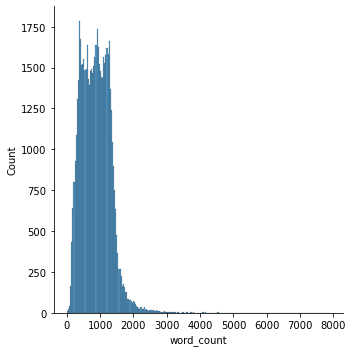

In [37]:
sns.displot(data=data,x='word_count',)

<AxesSubplot:xlabel='word_count', ylabel='S&P 500'>

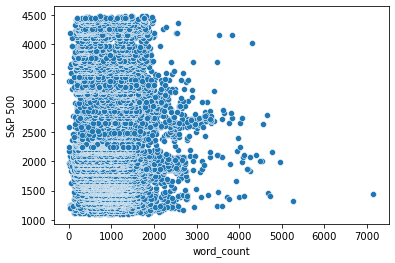

In [38]:
sns.scatterplot(x=data['word_count'],y=data['S&P 500'])

No real relationship not useful  

In [39]:
data.drop(columns='word_count',inplace=True)

## subsection_name

In [41]:
def missing_check(df):
    return df.isnull().sum()/len(df)

In [42]:
# percentage of missing values 
missing_check(data['subsection_name'])

0.5450593546229727

In [44]:
data['subsection_name'].value_counts(normalize=True)

Media                     0.282911
DealBook                  0.228188
Global Business           0.123631
Economy                   0.087284
International Business    0.081073
                            ...   
Fitness & Nutrition       0.000037
Africa                    0.000037
Health Guide              0.000037
Rugby                     0.000037
Books Update              0.000037
Name: subsection_name, Length: 71, dtype: float64

54% missing values and rest mostly in two categories. 
Missing values not missing at random as they are just general business articles without particular subsections. 


In [47]:
data.drop(columns='subsection_name',inplace=True)

## document_type

In [48]:
missing_check(data['document_type'])

0.0

In [49]:
data['document_type'].value_counts()

article    59810
Name: document_type, dtype: int64

- All results of same type so not useful 

In [50]:
data.drop(columns='document_type',inplace=True)

## section_name

In [51]:
missing_check(data['section_name'])

0.0

In [52]:
data['section_name'].value_counts(normalize=True)

Business Day                  0.711938
Technology                    0.166042
Your Money                    0.035245
Crosswords & Games            0.020515
Real Estate                   0.016017
Automobiles                   0.012205
The Upshot                    0.009079
Great Homes & Destinations    0.007457
U.S.                          0.006236
Health                        0.003478
Arts                          0.003478
World                         0.001806
Giving                        0.001221
Education                     0.001170
Science                       0.001070
Fashion & Style               0.000669
Smarter Living                0.000518
Travel                        0.000351
Books                         0.000251
Movies                        0.000217
Food                          0.000201
Climate                       0.000184
Sports                        0.000184
Well                          0.000117
New York                      0.000067
Reader Center            

Mostly in two categories. Not useful for what we are trying to do. 

In [53]:
data.drop(columns='section_name',inplace=True)

## type_of_material


In [86]:
data['type_of_material'].value_counts(normalize=True)

News             0.990470
News Analysis    0.004247
Interview        0.003745
List             0.001304
Text             0.000234
Name: type_of_material, dtype: float64

In [87]:
data.drop(columns='type_of_material',inplace=True)

## web_url

In [54]:
missing_check(data['web_url'])

0.0

No missing values we can leave as identifier for now 

In [55]:
# confirm all unique articles 
len(data['web_url'].unique()) == len(data['web_url'])

True

## abstract and snippet 

In [56]:
missing_check(data['abstract']),missing_check(data['snippet'])

(0.0, 0.0099983280387895)

In [57]:
pd.set_option('max_colwidth',None)

In [58]:
data[data['abstract']!= data['snippet']][['abstract','snippet']]

,abstract,snippet
date,,
2010-12-31,"Using a new mandate that gives the government unprecedented power over banks, Finance Minister Brian Lenihan said he would transfer billions of euros from national pension reserves into Allied Irish to guard against loan losses, and delist it from major stock exchanges, largely wiping out shareholders.","Using a new mandate that gives the government unprecedented power over banks, Finance Minister Brian Lenihan said he would transfer billions of euros from national pension reserves into Allied Irish to guard against loan losses, and delist it from..."
2011-06-22,"The European drug maker AstraZeneca said on Wednesday that it was selling its Astra Tech dental and medical device business to the American company Dentsply for $1.8 billion, in a deal that would create the third-largest dental implant company in the world.","The European drug maker AstraZeneca said on Wednesday that it was selling its Astra Tech dental and medical device business to the American company Dentsply for $1.8 billion, in a deal that would create the third-largest dental implant company in ..."
2011-10-10,"Adara Media, Mountain View, Calif., hired four executives: Jeff Cohen, vice president for strategic accounts; Brandon Meyers, sales director; Mark Hersch, vice president for strategic accounts, and Andrew Freedman, regional sales director for the eastern region.","Adara Media, Mountain View, Calif., hired four executives: Jeff Cohen, vice president for strategic accounts; Brandon Meyers, sales director; Mark Hersch, vice president for strategic accounts, and Andrew Freedman, regional sales director for the ..."
2011-11-11,"In its first over the air software update, Apple on Thursday issued a software update for the iOS 5 mobile platform that rectifies a battery problem on the iPhone 4S. The software update also adds missing multitasking gestures to the first iPad, fixes a security bug in the Apple iPad 2 and solves a syncing problem with documents and iCloud.","In its first over the air software update, Apple on Thursday issued a software update for the iOS 5 mobile platform that rectifies a battery problem on the iPhone 4S. The software update also adds missing multitasking gestures to the first iPad, f..."
2011-11-11,"The technology reporters and editors of The New York Times scour the Web looking for the most interesting, insightful and just plain odd news that might otherwise go unnoticed and unremarked. This morning brings a video of a precocious child who wows his audience, British attempts to recreate Silicon Valley and the patent for teasing a cat with a laser pen.","The technology reporters and editors of The New York Times scour the Web looking for the most interesting, insightful and just plain odd news that might otherwise go unnoticed and unremarked. This morning brings a video of a precocious child who w..."
...,...,...
2021-07-13,"Investors are increasingly eyeing the creator economy — the huge, largely unexplored market of providing digital tools to influencers and helping them run their businesses.",NaN
2021-07-14,"Americans get millions of illegal robocalls every month, despite attempts by the telecommunications industry and government agencies to stop them.",NaN
2021-07-29,"Nothing demonstrated the horrors of the coronavirus contagion in the early stages of the pandemic like the major outbreaks onboard cruise ships, when vacation selfies abruptly turned into grim journals of endless days spent confined to cabins as the virus raged, eventually infecting thousands of people on board, and killing more than 100.",NaN


In [59]:
data[data['abstract']!= data['snippet']][['abstract','snippet']].isnull().sum()

abstract      0
snippet     598
dtype: int64

In [60]:
601/len(data)

0.010048486875104498

Less then 1% of articles have different values for abstract and snippet. No point in keeping both 

In [61]:
data.drop(columns='snippet',inplace=True)

## lead_paragraph


In [62]:
# see if abstract and lead_paragraph provide same information.
data[['abstract','lead_paragraph']]

,abstract,lead_paragraph
date,,
2010-12-27,"Shoppers spent more this holiday season than at any time since before the recession, according to preliminary data.",Americans are splurging as though it’s 2007 again.
2010-12-28,The senators are inquiring about spinal surgeries on veterans and soldiers at the Walter Reed Army Medical Center.,Two senators are raising new questions about an experimental use of a Medtronic device in spinal surgery on veterans and soldiers at the Walter Reed Army Medical Center from 2002 to 2004.
2010-12-28,"Some of Canada’s five big banks, which have plenty of money to expand, have their eyes on the American banks despite lackluster investments so far.",OTTAWA — The Bank of Nova Scotia is sometimes praised for having a nearly perfect record with its investments in the United States. But it is the only one of Canada’s five large banks that has largely avoided the American market.
2010-12-28,"Major companies are building playgrounds to publicize their names, improve their images, encourage employees to volunteer and to promote fitness.","MARKETERS like Kraft Foods, MetLife, CVS and Dr Pepper/Snapple Group are steering millions in charitable dollars to a new and somewhat unlikely project — building neighborhood playgrounds for children."
2010-12-28,"Banks will probably be required to hold more capital in 2011, which will make them safer.",The “too big to fail” problem among banks will be partly fixed in 2011.
...,...,...
2021-08-17,"His newsletter will be free, and readers will have the option to pay a subscription fee to access video chats and previews of his upcoming projects.",The filmmaker and left-wing provocateur Michael Moore has a new venue for his work: the digital newsletter platform Substack.
2021-08-17,Proof that the online future has arrived: The biggest e-commerce company outside China has unseated the biggest brick-and-mortar seller.,"SEATTLE — Amazon has eclipsed Walmart to become the world’s largest retail seller outside China, according to corporate and industry data, a milestone in the shift from brick-and-mortar to online shopping that has changed how people buy everything from Teddy Grahams to teddy bears."
2021-08-17,"Amazon might not be the best shopping site, but using it can feel like magic.","This is a preview of the On Tech With Shira Ovide newsletter, which is now reserved for Times subscribers. Sign up to get it in your inbox three times a week."


Looks like lead paragraph provide different information about the same thing. This will give us more relevent text to work. 

We can consider combining the two relevent text fields into a single column for simplicity.  

In [63]:
data['text']= data['abstract']+ data['lead_paragraph']

In [64]:
# drop abstract and lead_paragraph 
data.drop(columns=['abstract','lead_paragraph'],inplace=True)

## keywords

In [65]:
# unique entries for keywords 
len(data['keywords'].value_counts())

55722

In [66]:
data['keywords'][0]

"[{'name': 'subject', 'value': 'Shopping and Retail', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'United States Economy', 'rank': 2, 'major': 'N'}, {'name': 'subject', 'value': 'Holidays and Special Occasions', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Sales', 'rank': 4, 'major': 'N'}, {'name': 'subject', 'value': 'Recession and Depression', 'rank': 5, 'major': 'N'}]"

In [68]:
# ignore first entry in list cause not keyword 
data['keywords'][0].split("{")[1:]

["'name': 'subject', 'value': 'Shopping and Retail', 'rank': 1, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'United States Economy', 'rank': 2, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'Holidays and Special Occasions', 'rank': 3, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'Sales', 'rank': 4, 'major': 'N'}, ",
 "'name': 'subject', 'value': 'Recession and Depression', 'rank': 5, 'major': 'N'}]"]

In [69]:
# first entry in list 
data['keywords'][0].split("{")[1:][0]

"'name': 'subject', 'value': 'Shopping and Retail', 'rank': 1, 'major': 'N'}, "

In [70]:
# 2nd method 
# referenced https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary
import ast

In [71]:
values_list = ast.literal_eval("[{'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'}, {'name': 'organizations', 'value': 'Chipotle Mexican Grill Inc', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'}, {'name': 'organizations', 'value': 'Pershing Square Holdings', 'rank': 5, 'major': 'N'}]")
values_list

[{'name': 'persons', 'value': 'Ackman, William A', 'rank': 2, 'major': 'N'},
 {'name': 'organizations',
  'value': 'Chipotle Mexican Grill Inc',
  'rank': 3,
  'major': 'N'},
 {'name': 'subject', 'value': 'Fast Food Industry', 'rank': 4, 'major': 'N'},
 {'name': 'organizations',
  'value': 'Pershing Square Holdings',
  'rank': 5,
  'major': 'N'}]

In [72]:
for value in values_list: 
    print(value['value'])

Ackman, William A
Chipotle Mexican Grill Inc
Fast Food Industry
Pershing Square Holdings


In [73]:
# helper function 
def grab_keywords(entry):
    'returns keywords as string from keyword entry for an article'
    result= ''
    entry_list= ast.literal_eval(entry)
    for value in entry_list:
        result += value['value'] + ' '
    return result.strip()
    

In [74]:
# test that the function works 
grab_keywords(data['keywords'][0])

'Shopping and Retail United States Economy Holidays and Special Occasions Sales Recession and Depression'

In [75]:
# make new column for topics using info from keywords 
data['topics']= data['keywords'].apply(grab_keywords)

In [76]:
# drop keyword column
data.drop(columns='keywords',inplace=True)

## headline 


In [77]:
data['headline'].head()

date
2010-12-27                                             {'main': 'Retail Sales Rebound, Beating Forecasts', 'kicker': None, 'content_kicker': None, 'print_headline': 'Retail Sales Rebound, Beating Forecasts', 'name': None, 'seo': None, 'sub': None}
2010-12-28                 {'main': '2 Senators Raise Questions on Use of Medtronic Device', 'kicker': None, 'content_kicker': None, 'print_headline': '2 Senators Raise Questions On Use of Medtronic Device', 'name': None, 'seo': None, 'sub': None}
2010-12-28                 {'main': 'U.S. Entices Big Banks in Canada', 'kicker': None, 'content_kicker': None, 'print_headline': 'U.S. Entices Some Banks in Canada Seeking Growth, Despite Variable Results', 'name': None, 'seo': None, 'sub': None}
2010-12-28    {'main': 'Companies Promote Health and Brands, Making Playgrounds', 'kicker': 'Advertising', 'content_kicker': None, 'print_headline': 'Companies Promote Health and Brands, Making Playgrounds', 'name': None, 'seo': None, 'sub': None}
201

Extract main since print headline will only exist if it was printed

In [78]:
data['headline'][0]

"{'main': 'Retail Sales Rebound, Beating Forecasts', 'kicker': None, 'content_kicker': None, 'print_headline': 'Retail Sales Rebound, Beating Forecasts', 'name': None, 'seo': None, 'sub': None}"

In [79]:
ast.literal_eval(data['headline'][0])

{'main': 'Retail Sales Rebound, Beating Forecasts',
 'kicker': None,
 'content_kicker': None,
 'print_headline': 'Retail Sales Rebound, Beating Forecasts',
 'name': None,
 'seo': None,
 'sub': None}

In [80]:
# helper function 
def grab_headline(entry):
    'returns main headline from headline column for a single entry'
    return ast.literal_eval(entry)['main']

     

In [81]:
# test that the function works 
grab_headline(data['headline'][0])

'Retail Sales Rebound, Beating Forecasts'

In [82]:
# grab headline for each entry in sample 
data['headline']= data['headline'].apply(grab_headline)

In [83]:
# add headline to front of text column for each observation 
data['text']= data['headline'] +". "+ data['text']

In [84]:
# drop headline column 
data.drop(columns='headline',inplace=True)

In [88]:
data.columns


Index(['web_url', 'S&P 500', 'text', 'topics'], dtype='object')

## S&P 500 


In [89]:
data.rename(columns={'S&P 500':'sp500'},inplace=True)

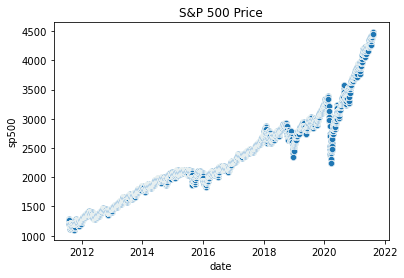

In [90]:
# sp500 over time in sample set
sns.scatterplot(x=data.index,y=data.sp500);
plt.title('S&P 500 Price');


In [91]:
missing_check(data['sp500'])

0.1639023574653068

In [ ]:
# drop days in sp500 with no articles 


###  impute nulls

we wont have data for weekends or holidays (days when market is closed) so impute price from previous day! m

In [92]:
# fill nulls with dummy value 
data['sp500'].fillna('replace',inplace=True) 

In [93]:
data.index

Index([2010-12-27, 2010-12-28, 2010-12-28, 2010-12-28, 2010-12-28, 2010-12-28,
       2010-12-28, 2010-12-28, 2010-12-28, 2010-12-28,
       ...
       2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17,
       2021-08-17, 2021-08-17, 2021-08-17, 2021-08-17],
      dtype='object', name='date', length=59810)

In [94]:
# remove date from index for now 
data.reset_index(inplace=True)

In [95]:
# replace nulls with price from previous day 
for i in range(1,len(data)): # 
    if data.loc[i,'sp500']=='replace':
        data.loc[i,'sp500'] = data.loc[i-1,'sp500']
    
    

In [96]:
# make sure all replaced properly 
'replace' in set(data['sp500'])

True

In [108]:
data[data['sp500']=='replace']['date']

0       2010-12-27
1       2010-12-28
2       2010-12-28
3       2010-12-28
4       2010-12-28
           ...    
3410    2011-07-28
3411    2011-07-28
3412    2011-07-28
3413    2011-07-28
3414    2011-07-28
Name: date, Length: 3415, dtype: object

In [109]:
sp500['Effective date ']

0       7/29/2011
1        8/1/2011
2        8/2/2011
3        8/3/2011
4        8/4/2011
          ...    
2528    8/16/2021
2529    8/17/2021
2530    8/18/2021
2531    8/19/2021
2532    8/20/2021
Name: Effective date , Length: 2533, dtype: object

The ones with replace are ones that we do not have sp500 data from. 

We will drop these entries for now. 

In [111]:
# drop all rows for which we do not have sp500 (older then 10 years ago)
data= data[data['sp500']!='replace']

In [115]:
data.reset_index(drop=True,inplace=True)

### change in price  

#### combine text from articles to single row 

In [117]:
# add topics to text column
data['text']= data['text']+ ' ' + data['topics']

<ipython-input-117-6b201c8c49a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']= data['text']+ ' ' + data['topics']


In [119]:
# confirm worked 
data['text'][0]

'Drug App Comes Free, Ads Included. Epocrates has won over nearly half of the nation’s doctors with its smartphone app. But “free” comes with a price.Epocrates has won over nearly half of the nation’s doctors for its free smartphone apps that lets them look up information on drug dosing, interactions and insurance coverage while seeing a patient.Epocrates Inc Drugs (Pharmaceuticals) Mobile Applications Doctors Advertising and Marketing Smartphones Epocrates Inc Drugs (Pharmaceuticals) Mobile Applications Doctors Advertising and Marketing Smartphones'

In [121]:
# drop web_urls and topics 
data.drop(columns=['web_url','topics'],inplace=True)

/home/tanveer/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [122]:
data.head()

,date,sp500,text
0,2011-07-29,1292.28,"Drug App Comes Free, Ads Included. Epocrates has won over nearly half of the nation’s doctors with its smartphone app. But “free” comes with a price.Epocrates has won over nearly half of the nation’s doctors for its free smartphone apps that lets them look up information on drug dosing, interactions and insurance coverage while seeing a patient.Epocrates Inc Drugs (Pharmaceuticals) Mobile Applications Doctors Advertising and Marketing Smartphones Epocrates Inc Drugs (Pharmaceuticals) Mobile Applications Doctors Advertising and Marketing Smartphones"
1,2011-07-29,1292.28,"Just Before Deadline, County in Alabama Delays Bankruptcy Move. Commissioners are taking seven days to study a proposal that would reduce the total amount owed, bring down the county’s interest rate and avert bankruptcy.There may still be a way out for Jefferson County, the Alabama county being crushed by its debt.Bankruptcies Alabama Local Government Bankruptcies Alabama Local Government"
2,2011-07-29,1292.28,"Judge’s Ruling in Madoff Case Could Reduce Money for Victims. The ruling could pare billions of dollars from the sum that may ultimately be recovered for victims of Bernard L. Madoff’s Ponzi scheme.A federal judge ruled on Thursday that the bankruptcy trustee trying to recover billions for those who lost money in Bernard L. Madoff’s enormous Ponzi scheme did not have the right to sue banks and other third parties on behalf of the victims.Madoff, Bernard L Rakoff, Jed S Picard, Irving H HSBC Holdings PLC Decisions and Verdicts Ponzi Schemes Madoff, Bernard L Rakoff, Jed S Picard, Irving H HSBC Holdings PLC Decisions and Verdicts Ponzi Schemes"
3,2011-07-29,1292.28,"Making the Diaper Change Easier for the Changer. Marketing for Huggies Little Movers Slip-On Diapers is focusing on mothers of babies who have a tendency to squirm during a diaper change.IN a new commercial for Huggies Little Movers Slip-On Diapers, which have leg holes and slide on like underwear, a baby rolls over twice in the same direction as a voiceover begins, “Huggies presents a whole new way to change a rolling pin.” Diapers Consumer Behavior Babies and Infants Diapers Consumer Behavior Babies and Infants"
4,2011-07-29,1292.28,"Carmakers Back Strict New Rules for Gas Mileage. A hike in government fuel rules to 54.5 miles per gallon by 2025 is being meekly accepted by the car industry.DETROIT — Four years ago, the American auto industry was so opposed to higher fuel economy standards that executives of Detroit camped out in Washington in an unsuccessful bid to undercut them.Automobiles Fuel Efficiency United States Politics and Government General Motors Chrysler LLC Ford Motor Company Obama, Barack Automobiles Fuel Efficiency United States Politics and Government General Motors Chrysler LLC Ford Motor Company Obama, Barack"


In [124]:
# make dictionary with dates and keys and all text for that date as values 
dates = dict()
for i in range(len(data)):
    if data.loc[i,'date'] in dates.keys(): # if already in dates dict 
        dates[data.loc[i,'date']] += ' ' + str(data.loc[i,'text'])
    else: 
        dates[data.loc[i,'date']] = data.loc[i,'text']
    
        

In [125]:
# make dates dict into dataframe
daily = pd.DataFrame(list(dates.items()),columns=['date','text'])

In [126]:
# make date index for sp500 dataframe 
sp500.set_index('date',inplace=True)

In [127]:
# get sp500 price for every date in daily 
for i in range(len(daily)):
    day= daily.loc[i,'date']
    if day in set(sp500.index):
        daily.loc[i,'price'] = sp500.loc[day,'S&P 500']
    else: 
        daily.loc[i,'price']= 'replace'
    

In [128]:
daily['price']

0       1292.28
1       replace
2       replace
3       1286.94
4       1254.05
         ...   
3648     4468.0
3649    replace
3650    replace
3651    4479.71
3652    4448.08
Name: price, Length: 3653, dtype: object

In [130]:
# update replace to price from previous day 
for i in range(len(daily)):
    if daily.loc[i,'price']=='replace':
        daily.loc[i,'price']= daily.loc[i-1,'price']

In [131]:
# confirm updated 
'replace' in set(daily['price'])

False

In [132]:
daily.head()

date  \
0  2011-07-29   
1  2011-07-30   
2  2011-07-31   
3  2011-08-01   
4  2011-08-02   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

# Feature Engineering  

## column for percent change in price  


In [133]:
daily['price']

0       1292.28
1       1292.28
2       1292.28
3       1286.94
4       1254.05
         ...   
3648     4468.0
3649     4468.0
3650     4468.0
3651    4479.71
3652    4448.08
Name: price, Length: 3653, dtype: object

In [136]:
daily['pct_change']= daily['price'].pct_change()

In [138]:
daily[['price','pct_change']].head()

,price,pct_change
0,1292.28,NaN
1,1292.28,0.000000
2,1292.28,0.000000
3,1286.94,-0.004132
4,1254.05,-0.025557


## Add Column for direction of change  

In [139]:
# add column for type of price_direction 
price_direction=['first']
for i in range(1,len(daily)):
    if daily.loc[i,'pct_change']>0: price_direction.append('up')
    elif daily.loc[i,'pct_change']<0: price_direction.append('down')
    else: price_direction.append('same')
daily['price_direction']= price_direction

In [140]:
daily[['price','pct_change','price_direction']].head()

,price,pct_change,price_direction
0,1292.28,NaN,first
1,1292.28,0.000000,same
2,1292.28,0.000000,same
3,1286.94,-0.004132,down
4,1254.05,-0.025557,down


In [142]:
daily['price_direction'].value_counts(normalize=True)

up       0.380783
down     0.311251
same     0.307692
first    0.000274
Name: price_direction, dtype: float64

## add column for day of the week 


In [143]:
# make column for day of the week 
daily['day_of_week']= daily['date'].apply(lambda x: x.weekday())

In [144]:
daily['day_of_week'].value_counts(normalize=True)

4    0.143717
0    0.143717
1    0.143717
2    0.143444
3    0.143444
6    0.142896
5    0.139064
Name: day_of_week, dtype: float64

## add column is_holiday

When a holiday falls on a weekend, market closures are dictated by two rules:

If the holiday falls on a Saturday, the market will close on the preceding Friday.

If the holiday falls on a Sunday, the market will close on the subsequent Monday.

Early close days not included because market is open so people have an oppurtunity to respond to market conditions. 

In [145]:
# holidays for each year where market is closed 

# source: https://www.nyse.com/markets/hours-calendars
holidays_2021 = [datetime.date(2021,1,1),datetime.date(2021,1,18),
                datetime.date(2021,2,15), datetime.date(2021,4,2),
                datetime.date(2021,5,31),datetime.date(2021,7,5),
                datetime.date(2021,9,6),datetime.date(2021,12,24)]

#source: https://www.yahoo.com/now/2020-stock-market-holidays-bond-170244040.html
holidays_2020 = [datetime.date(2020,1,1),datetime.date(2020,1,20),
                datetime.date(2020,2,17),
                 datetime.date(2020,4,10),
                 datetime.date(2020,5,25),datetime.date(2020,7,3),
                 datetime.date(2020,9,7), datetime.date(2020,11,26),
                 datetime.date(2020,12,25),]

# source: https://www.yahoo.com/now/2019-stock-market-holidays-bond-200739197.html
holidays_2019 = [datetime.date(2019,1,1),datetime.date(2019,1,21),
                datetime.date(2019,2,18),datetime.date(2019,4,19),
                datetime.date(2019,1,1),datetime.date(2019,5,27),
                datetime.date(2019,7,4),datetime.date(2019,9,2),
                datetime.date(2019,11,28),datetime.date(2019,12,25),]

# source: https://www.yahoo.com/now/2018-stock-market-holidays-bond-184004911.html
holidays_2018 = [datetime.date(2018,1,1),datetime.date(2018,1,15),
                datetime.date(2018,2,19),datetime.date(2018,3,30),
                datetime.date(2018,5,28),datetime.date(2018,7,4),
                datetime.date(2018,9,3),datetime.date(2018,11,22),
                datetime.date(2018,12,5),datetime.date(2018,12,25),]

# source: https://www.businesswire.com/news/home/20160202006502/en/NYSE-Group-Announces-2017-Holiday-and-Early-Closings-Calendar
holidays_2017= [datetime.date(2017,1,2),datetime.date(2017,1,16),
               datetime.date(2017,2,20),datetime.date(2017,4,14),
               datetime.date(2017,5,29),datetime.date(2017,7,4),
               datetime.date(2017,9,4),datetime.date(2017,11,23),
               datetime.date(2017,12,25),]

# source: https://money.com/nyse-nasdaq-market-holidays-2016/
holidays_2016 = [datetime.date(2016,1,1),datetime.date(2016,1,18),
                datetime.date(2016,2,15),datetime.date(2016,3,25),
                datetime.date(2016,5,30),datetime.date(2016,7,4),
                datetime.date(2016,9,5),datetime.date(2016,11,24),
                datetime.date(2016,12,26),]

# source: https://www.fool.com/investing/general/2015/05/29/stock-market-holidays-2015.aspx
holidays_2015 = [datetime.date(2015,1,1),datetime.date(2015,1,19),
                datetime.date(2015,2,16),datetime.date(2015,4,3),
                datetime.date(2015,5,25),datetime.date(2015,7,3),
                datetime.date(2015,9,7),datetime.date(2015,11,26),
                datetime.date(2015,12,25),]

# source: https://stock-market-holidays.org/2014-new-york-stock-exchange-holidays/
holidays_2014= [datetime.date(2014,1,1),datetime.date(2014,1,20),
               datetime.date(2014,2,17),datetime.date(2014,4,18),
               datetime.date(2014,5,26),datetime.date(2014,7,4),
               datetime.date(2014,9,1),datetime.date(2014,11,27),
               datetime.date(2014,12,25),]

# source:https://www.aol.com/2013/02/15/stock-market-holidays-closings-2013/
holidays_2013= [datetime.date(2013,1,1),datetime.date(2013,1,21),
               datetime.date(2013,2,18),datetime.date(2013,3,29),
               datetime.date(2013,5,27),datetime.date(2013,7,4),
               datetime.date(2013,9,2),datetime.date(2013,11,28),
               datetime.date(2013,12,25),]

# source: https://holidaystracker.com/stock-market/new-york-stock-exchange-holidays-2012/
holidays_2012 = [datetime.date(2012,1,2),datetime.date(2012,1,16),
               datetime.date(2012,2,20),datetime.date(2012,4,6),
               datetime.date(2012,5,28),datetime.date(2012,7,4),
               datetime.date(2012,9,3),datetime.date(2012,11,22),
               datetime.date(2012,12,25),]

# source: http://www.market-holidays.com/2011
holidays_2011 = [datetime.date(2010,12,31),datetime.date(2011,1,17),
               datetime.date(2011,2,21),datetime.date(2011,4,22),
               datetime.date(2011,5,30),datetime.date(2011,7,4),
               datetime.date(2011,9,5),datetime.date(2011,11,24),
               datetime.date(2011,12,26),]

# source: http://www.market-holidays.com/2010
holidays_2010 = [datetime.date(2010,1,1),datetime.date(2010,1,18),
               datetime.date(2010,2,15),datetime.date(2010,4,2),
               datetime.date(2010,5,31),datetime.date(2010,7,5),
               datetime.date(2010,9,6),datetime.date(2010,11,25),
               datetime.date(2010,12,24),]

# source: http://www.market-holidays.com/2009
holidays_2009 = [datetime.date(2009,1,1),datetime.date(2009,1,19),
               datetime.date(2009,2,16),datetime.date(2009,4,10),
               datetime.date(2009,5,25),datetime.date(2009,7,3),
               datetime.date(2009,9,7),datetime.date(2009,11,26),
               datetime.date(2009,12,25),]

In [146]:
# combine  lists 
holidays_2021.extend(holidays_2020)
holidays_2021.extend(holidays_2019)
holidays_2021.extend(holidays_2018)
holidays_2021.extend(holidays_2017)
holidays_2021.extend(holidays_2016)
holidays_2021.extend(holidays_2015)
holidays_2021.extend(holidays_2014)
holidays_2021.extend(holidays_2013)
holidays_2021.extend(holidays_2012)
holidays_2021.extend(holidays_2011)
holidays_2021.extend(holidays_2010)
holidays_2021.extend(holidays_2009)

In [147]:
# make column indicating if that date is a holiday for the stock market 
daily['is_holiday']= daily['date'].apply(lambda x: 1 if x in set(holidays_2021) else 0)

In [148]:
daily['is_holiday'].sum()

91

About 9 holidays per year for the stock market so this is reasonable considering we have data for 10 years.  

In [150]:
# save file 
daily.to_pickle('daily.pkl')

In [155]:
# to load file 
# daily = pd.read_pickle('daily.pkl')

In [156]:
daily.to_csv('daily.csv')

# Open and close price 

In [158]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=a1a29a7f4db06fd4d5ccf68048df2bcd966f7bd39daac1ac66c236791759208a
  Stored in directory: /home/tanveer/.cache/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=99e86c2547a8d0c7105d06bf3d2cbc4ac104078664c7fef43593a018e31b91d4
  Stored in directory: /home/tanveer/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [159]:
import yfinance as yf

In [164]:
sp500 = yf.Ticker('^GSPC')
sp500_hist = sp500.history(period='11y')


In [168]:
sp500_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-08-25,1048.979980,1059.380005,1039.829956,1055.329956,4360190000,0,0
2010-08-26,1056.280029,1061.449951,1045.400024,1047.219971,3646710000,0,0
2010-08-27,1049.270020,1065.209961,1039.699951,1064.589966,4102460000,0,0
2010-08-30,1062.900024,1064.400024,1048.790039,1048.920044,2917990000,0,0
2010-08-31,1046.880005,1055.140015,1040.880005,1049.329956,4038770000,0,0
...,...,...,...,...,...,...,...
2021-08-18,4440.939941,4454.319824,4397.589844,4400.270020,2965210000,0,0
2021-08-19,4382.439941,4418.609863,4367.729980,4405.799805,3120840000,0,0
2021-08-20,4410.560059,4444.350098,4406.799805,4441.669922,2867770000,0,0


In [169]:
sp500_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [171]:
# keep only open,close and volume 
sp500_hist= sp500_hist[['Open','Close','Volume']]

In [173]:
# make a copy of daily to add open and close prices 
oc_daily = daily.copy()

In [175]:
# drop old price columns before adding open/close
oc_daily.drop(columns=['price', 'pct_change', 'price_direction'],inplace=True)

In [178]:
# set date as index for easier combining with articles 
oc_daily.set_index('date',inplace=True)

In [192]:
#combine oc_daily with sp500_hist 
test= oc_daily.join(sp500_hist)

In [193]:
# check size of result
test.shape

(3653, 6)

In [194]:
test.columns

Index(['text', 'day_of_week', 'is_holiday', 'Open', 'Close', 'Volume'], dtype='object')

In [195]:
test.isnull().sum()

text              0
day_of_week       0
is_holiday        0
Open           1123
Close          1123
Volume         1123
dtype: int64

In [196]:
# look at which days have null values 
test[test['Open'].isnull()][['day_of_week', 'is_holiday', 'Open', 'Close', 'Volume']]

,day_of_week,is_holiday,Open,Close,Volume
date,,,,,
2011-07-30,5,0,NaN,NaN,NaN
2011-07-31,6,0,NaN,NaN,NaN
2011-08-06,5,0,NaN,NaN,NaN
2011-08-07,6,0,NaN,NaN,NaN
2011-08-13,5,0,NaN,NaN,NaN
...,...,...,...,...,...
2021-08-01,6,0,NaN,NaN,NaN
2021-08-07,5,0,NaN,NaN,NaN
2021-08-08,6,0,NaN,NaN,NaN


In [198]:
#check days of the week for missing values 
test[test['Open'].isnull()][[ 'day_of_week']].value_counts()

day_of_week
6              522
5              508
0               49
4               17
3               14
2                7
1                6
dtype: int64

In [197]:
# check how many holidays are missing 
test[test['Open'].isnull()][[ 'is_holiday']].value_counts()

is_holiday
0             1032
1               91
dtype: int64

In [203]:
# see what is missing and not a weekend or holiday 
test[(test['Open'].isnull()) & (test['day_of_week']<5)&(test['is_holiday']!=1)][['day_of_week', 'is_holiday', 'Open', 'Close', 'Volume']]

,day_of_week,is_holiday,Open,Close,Volume
date,,,,,
2012-10-29,0,0,NaN,NaN,NaN
2012-10-30,1,0,NaN,NaN,NaN
2018-11-22,3,0,NaN,NaN,NaN


source: https://www.onthisday.com/date/2012/october/29
Huricane Sandy closed markets 
source: https://www.wincalendar.com/Calendar/Date/November-22-2018
Thanksgiving so should be holiday 


In [208]:
# remove date from index for manipulation 
test.reset_index(drop=False,inplace=True)

In [ ]:
for i in test.index:
    if test.loc[i,'Open'].isnull(): 
        

 Entries with missing values are on the weekend so we can impute the closing price from Friday. 

In [188]:
test.shape

(5, 6)

In [187]:
test[['day_of_week', 'is_holiday', 'Open', 'Close', 'Volume']]

,day_of_week,is_holiday,Open,Close,Volume
date,,,,,
2011-07-29,4,0,1300.119995,1292.280029,5.061190e+09
2011-07-30,5,0,NaN,NaN,NaN
2011-07-31,6,0,NaN,NaN,NaN
2011-08-01,0,0,1292.589966,1286.939941,4.967390e+09
2011-08-02,1,0,1286.560059,1254.050049,5.206290e+09


In [211]:
# add replace for all nulls 
test.fillna('replace',inplace=True) 

In [215]:
test.columns

Index(['date', 'text', 'day_of_week', 'is_holiday', 'Open', 'Close', 'Volume'], dtype='object')

In [216]:
# add prices and volumes for nulls 
for i in range(1,len(test)): # 
    if test.loc[i,'Open']=='replace': # if nulls 
        test.loc[i,'Open'] = test.loc[i-1,'Close'] # make open to yesterdays close since no change 
        test.loc[i,'Close'] = test.loc[i-1,'Close'] # make close to yesterdays close since no change
        test.loc[i,'Volume'] = 0 # make volume 0 since no trading occured 
    
    

In [217]:
# check results 
'result' in set(test['Open'])

False

In [218]:
# confirm no more nulls 
test.isnull().sum()

date           0
text           0
day_of_week    0
is_holiday     0
Open           0
Close          0
Volume         0
dtype: int64

In [220]:
test.shape

(3653, 7)

In [221]:
# set Date as index again 
test.set_index('date',inplace=True)

In [223]:
# save results as csv 
test.to_csv('./Data/oc_daily.csv')

# Columns to add 

- trends in price? seasonality? 
- lagged price? how many days? 
- lagged text or sentiment analysis? 
- rolling mean of price? 
- check autocorrelation and partial autocorrelation plots! Box-Pierce test?Ljung-Box test? 

- check for white noise? 
- box-cox transformation
- 
# models 

- baseline model with only non-text/nlp features for comparison with 
    -average method 
    - naive method 
    - drift method 
    - https://otexts.com/fpp2/simple-methods.html
- check accuracy/residuals for comparing different models?  https://otexts.com/fpp2/residuals.html
    -Mean absolute percentage error 
- prediction intervals https://otexts.com/fpp2/prediction-intervals.html
- 
    